# [Exercices] Premier pas avec `pandas`


# [Ex. 1] 


##### On s'intéresse au fichier disponible à : `data/co2-data/owid-co2-data.csv` 

- 1 - Lire le fichier
- 2 - S'assurer de la cohérence du type de chaque colonne
- 3 - Classer les pays par émissions totales de CO2 (= colonne `co2`) par ordre décroissant (quelle est l'unité de la variable CO2 ?). On pourra classer les pays seulement sur 2018.
- 4 - Classer les pays par PIB (= colonne `gdp`) par ordre décroissant. (quelle est l'unité de la variable PIB ?)
- 5 - Classer les pays par CO2 / PIB par ordre décroissant.
- 6 - Réaliser les top 25 pour ces 3 classements
- 7 - Quels pays apparraissent dans deux top ? 
- 8 - Dans 3 tops ?

In [1]:
import pandas as pd
# 1 
df = pd.read_csv("../data/co2-data/owid-co2-data.csv")

#### question 2

In [2]:
# df.info()

#### question 3

In [3]:
# Filtrer sur 2018
df = df[df.year==2018]

In [4]:
# CO2 = 305 donc forcément => Millions de Tonnes (car 67*4.4=294.8)
df[(df.country=="France")][["country", "co2"]]

,country,co2
15685,France,322.527


In [5]:
# Pour les regroupements de pays, pas de iso_code
df.sort_values("co2", ascending=False).head(3)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
46003,World,2018,NaN,7.683790e+09,1.136302e+14,1569.218,0.204,36826.508,729.772,2.022,...,100.000,100.000,100.000,100.000,100.000,100.000,49368.039,47980.469,-0.004,-0.000
30254,Non-OECD (GCP),2018,NaN,NaN,NaN,NaN,NaN,22945.100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,Asia,2018,NaN,4.588803e+09,NaN,1260.604,0.275,20437.713,598.067,3.015,...,57.756,29.528,39.276,51.124,38.714,66.421,25456.090,25238.279,-1360.064,-6.655


In [6]:
# Filtrer sur les lignes qui ont un iso_code renseigné
# On garde les lignes qui ont iso_code qui n'est PAS une valeur nulle
# ~ = 'not vectorisé' 
df = df[~df.iso_code.isnull()]

df.sort_values("co2", ascending=False).head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8987,China,2018,CHN,1.417069e+09,1.815162e+13,786.745,0.555,10353.877,342.770,3.424,...,49.848,0.813,7.641,5.886,12.233,56.711,11821.66,12471.09,-727.290,-7.024
44219,United States,2018,USA,3.321400e+08,1.814065e+13,38.971,0.117,5376.657,165.700,3.180,...,15.370,17.662,21.497,1.936,19.283,8.164,5892.37,6121.63,428.020,7.961
20134,India,2018,IND,1.369003e+09,8.835758e+12,138.965,0.102,2600.447,165.578,6.800,...,NaN,0.604,1.676,3.750,5.342,NaN,3360.56,3388.92,-168.744,-6.489
35051,Russia,2018,RUS,1.456523e+08,3.613410e+12,20.091,0.138,1700.453,46.299,2.799,...,5.772,11.996,10.962,8.962,3.192,5.819,1868.15,2419.47,-343.469,-20.199
21754,Japan,2018,JPN,1.262559e+08,4.867011e+12,26.183,0.207,1143.412,-44.947,-3.782,...,3.144,0.103,3.107,-0.016,3.526,2.770,1172.32,1204.37,136.863,11.970
16792,Germany,2018,DEU,8.289670e+07,3.885961e+12,13.228,0.160,754.408,-31.208,-3.972,...,3.079,0.487,2.252,-0.220,2.162,2.885,771.48,800.96,130.370,17.281
20550,Iran,2018,IRN,8.561756e+07,1.398996e+12,19.091,0.223,700.938,15.536,2.267,...,NaN,7.871,5.433,-0.570,1.919,NaN,925.58,925.52,-106.350,-15.173
39257,South Korea,2018,KOR,5.167690e+07,1.958392e+12,24.702,0.478,670.169,15.631,2.388,...,2.071,0.000,1.556,-0.141,1.448,3.410,669.70,715.50,52.522,7.837
36662,Saudi Arabia,2018,SAU,3.501813e+07,1.677339e+12,25.135,0.718,626.191,-17.447,-2.711,...,NaN,1.052,3.416,0.043,2.768,NaN,715.23,715.23,-24.479,-3.909
20306,Indonesia,2018,IDN,2.670668e+08,3.075456e+12,30.832,0.115,603.657,36.402,6.417,...,NaN,0.958,1.118,26.558,1.814,NaN,1692.36,958.08,9.487,1.572


#### question 4

In [7]:
df = df[~df.gdp.isnull()]
df.sort_values("gdp", ascending=False).head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8987,China,2018,CHN,1.417069e+09,1.815162e+13,786.745,0.555,10353.877,342.770,3.424,...,49.848,0.813,7.641,5.886,12.233,56.711,11821.66,12471.09,-727.290,-7.024
44219,United States,2018,USA,3.321400e+08,1.814065e+13,38.971,0.117,5376.657,165.700,3.180,...,15.370,17.662,21.497,1.936,19.283,8.164,5892.37,6121.63,428.020,7.961
20134,India,2018,IND,1.369003e+09,8.835758e+12,138.965,0.102,2600.447,165.578,6.800,...,NaN,0.604,1.676,3.750,5.342,NaN,3360.56,3388.92,-168.744,-6.489
21754,Japan,2018,JPN,1.262559e+08,4.867011e+12,26.183,0.207,1143.412,-44.947,-3.782,...,3.144,0.103,3.107,-0.016,3.526,2.770,1172.32,1204.37,136.863,11.970
16792,Germany,2018,DEU,8.289670e+07,3.885961e+12,13.228,0.160,754.408,-31.208,-3.972,...,3.079,0.487,2.252,-0.220,2.162,2.885,771.48,800.96,130.370,17.281
35051,Russia,2018,RUS,1.456523e+08,3.613410e+12,20.091,0.138,1700.453,46.299,2.799,...,5.772,11.996,10.962,8.962,3.192,5.819,1868.15,2419.47,-343.469,-20.199
20306,Indonesia,2018,IDN,2.670668e+08,3.075456e+12,30.832,0.115,603.657,36.402,6.417,...,NaN,0.958,1.118,26.558,1.814,NaN,1692.36,958.08,9.487,1.572
6426,Brazil,2018,BRA,2.101666e+08,2.965402e+12,19.342,0.092,477.102,-20.311,-4.083,...,1.713,4.248,0.895,21.855,2.451,2.113,1434.51,1046.58,0.940,0.197
15685,France,2018,FRA,6.427781e+07,2.581674e+12,6.495,0.101,322.527,-14.931,-4.424,...,1.487,0.705,1.126,-0.447,1.544,1.338,360.76,422.74,105.253,32.634
43997,United Kingdom,2018,GBR,6.643300e+07,2.540210e+12,4.364,0.066,379.730,-7.637,-1.972,...,1.214,1.086,2.145,0.126,1.411,1.004,442.48,453.43,156.052,41.096


#### question 5

In [8]:
df["co2/gdp"] = df["co2"] / df["gdp"]

In [9]:
df.sort_values("co2/gdp", ascending=False).head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,co2/gdp
31142,North Korea,2018,PRK,2.563815e+07,4.051714e+10,2.226,0.087,47.630,-4.106,-7.936,...,0.000,0.000,0.223,0.024,NaN,76.86,73.47,NaN,NaN,1.175552e-09
42241,Trinidad and Tobago,2018,TTO,1.504707e+06,3.469735e+10,0.257,0.171,40.328,0.010,0.025,...,0.088,0.475,-0.007,0.032,NaN,28.81,28.69,-17.351,-43.025,1.162279e-09
27560,Mongolia,2018,MNG,3.163994e+06,4.153176e+10,0.414,0.131,45.316,11.180,32.753,...,0.001,0.000,-0.177,0.032,NaN,55.74,52.64,-4.539,-10.017,1.091117e-09
22274,Kazakhstan,2018,KAZ,1.853810e+07,4.637205e+11,3.891,0.210,331.821,11.029,3.438,...,4.067,0.911,-0.275,0.399,0.946,275.56,278.54,-149.467,-45.045,7.155624e-10
38641,South Africa,2018,ZAF,5.733963e+07,6.732722e+11,5.466,0.095,435.237,-4.143,-0.943,...,0.014,0.121,-0.035,0.534,NaN,556.72,549.65,-122.723,-28.197,6.464503e-10
8987,China,2018,CHN,1.417069e+09,1.815162e+13,786.745,0.555,10353.877,342.770,3.424,...,0.813,7.641,5.886,12.233,56.711,11821.66,12471.09,-727.290,-7.024,5.704106e-10
23913,Libya,2018,LBY,6.477791e+06,1.004160e+11,1.744,0.269,54.016,0.579,1.083,...,2.136,0.233,-0.011,0.211,NaN,121.57,121.57,NaN,NaN,5.379221e-10
43553,Ukraine,2018,UKR,4.444695e+07,4.313199e+11,3.719,0.084,231.675,8.588,3.849,...,0.582,0.890,0.253,0.287,0.928,232.76,244.84,-18.326,-7.910,5.371303e-10
6082,Bosnia and Herzegovina,2018,BIH,3.400132e+06,4.128632e+10,0.381,0.112,22.075,-0.081,-0.366,...,0.000,0.006,-0.015,0.038,NaN,26.01,27.75,NaN,NaN,5.346807e-10
40861,Syria,2018,SYR,1.933346e+07,5.671062e+10,0.751,0.039,30.230,-2.383,-7.308,...,0.325,0.091,-0.010,0.174,NaN,48.26,48.25,NaN,NaN,5.330572e-10


##### Rappel : list comprehension

In [34]:
res = []
for x in range(10):
    res.append(x**2)
res

res = [x**2 for x in range(10)]
res

res = [(x,y) for x in range(1, 9) for y in range(1, 9)]
res


res = [x**2 for x in range(10) if x%2==0]
res

[0, 4, 16, 36, 64]

#### Question 6

In [40]:
top_25 = {}
for variable in ["co2", "gdp", "co2/gdp"]:
    top_25[variable] = df.nlargest(25, variable)['country'].tolist()

def intersect(la, lb):
    # return [value for value in la if value in lb]
    return list(set(la) & set(lb))

comparison = {}
for variable_a, variable_b in [("co2", "gdp"), ("co2", "co2/gdp"), ("gdp", "co2/gdp")]:        
    comparison[(variable_a, variable_b)] = intersect(top_25[variable_a], top_25[variable_b])


#### Question 7

In [50]:
# comparison[('co2', 'gdp')]
# comparison[('co2', 'co2/gdp')]
#comparison[('gdp', 'co2/gdp')]

#### Question 8

In [47]:
def intersect(la, lb, lc):
    return list(set(la) & set(lb) & set(lc))

intersect(top_25["co2"], top_25["gdp"], top_25["co2/gdp"])

['Iran', 'Saudi Arabia', 'Russia', 'China']

# [Ex. 2] Création de données de tests

### Question 1

> On veut créer un historique de ventes pour tester le code d'un future site de ecommerce - on peut le résumer dans le fichier CSV suivant :  

|        timestamp | customer_id | product_id | quantity | price | revenue |
|-----------------:|------------:|-----------:|---------:|------:|--------:|
| 2022/12/27 13:05 |        1986 |       3456 |        4 |     5 |      20 |
| 2022/12/27 13:05 |        1986 |       3459 |        3 |     6 |      18 |
| 2022/12/27 13:06 |       24501 |       1242 |        2 |     4 |       8 |
| 2022/12/27 13:12 |       48285 |       3424 |        4 |    25 |     100 |
| 2022/12/27 13:14 |        2422 |       3456 |       10 |     5 |      50 |
|              ... |         ... |        ... |      ... |   ... |     ... |


- timestamp (datetime)
- customer_id (int)
- product_id (int)
- quantity (int)
- price (int)
- revenue (int)


De plus on souhaite que l'historique vérifie les contraintes suivantes : 
- La période va du 2022/07/01 00:00:00 au 2022/12/31 23:59:59 (inclus)
- 100 000 transactions (lignes) 
- 4000 clients différents
- 250 produits différents avec un prix moyen de 15 €
- La quantité moyenne vendue par transaction est de 2.1 unités
- Un même produit est toujours vendu au même prix

**Créer un tel fichier**

(**en adaptant le code ci-dessous avec les bonnes constantes et en ajoutant les bons imports**)


### Question 2 
On ajoute les contraintes suivantes : 
- Lorsque l'on achète le mardi, on bénéficie d'une remise (crée une colonne discount)
    - De 5% pour une transaction de 1 à 3 produits
    - De 10% pour une transaction à partir de 4 produits
- Les clients sont 50 % à faire au moins une transaction par mois sur tout la période
- 10 % des clients font une seule transaction sur tout la période


**Créer un tel fichier**


### Question 3
Ecrire une fonction `split_train_test` qui prend en argument une DataFrame `df` et un réel `test_proportion` entre 0 et 1 et renvoie deux DataFrames `train` et `test`, ayant les mêmes colonnes que `df` et se partageant ses lignes (aléatoirement et de manière mutuellement exclusive) avec les proportions `1 - test_portion` et `test_portion`


### Question 4
Même question, en faisant en sorte que les moyennes des variables quantitatives des deux DataFrames `test` et `train` soient proches de celles des moyennes des variables quantitatives de `df` (moins de 10% d'écart)

### Question 5
Même question, en faisant en sorte que les histogrammes des variables quantitatives des deux DataFrames `test` et `train` soient ressemblant à ceux des variables quantitatives de `df` (moins de 10% d'écart)

In [198]:
import pandas as pd
import numpy as np
import datetime
# Question 1

# La période va du 2022/07/01 00:00:00 au 2022/12/31 23:59:59 (inclus)
# 100 000 transactions (lignes)
# 4000 clients différents
# 250 produits différents avec un prix moyen de 15 €
# La quantité moyenne vendue par transaction est de 2.1 unités
# Un même produit est toujours vendu au même prix


N_PRODUITS = 250
N_CLIENTS = 4_000
N_TRANSACTIONS = 100_000
DATE_START = datetime.date(2022, 7, 1)
DATE_END = datetime.date(2022, 12, 31)


######################################################################
# Fonctions qui génère des données "intelligemment"
######################################################################

def generate_random_price():
    return np.random.choice(
        [12, 14, 15, 16, 17, 18], 
        p=[0.4,0.05,0.1,0.05,0.2, 0.2]
    )


#def generate_random_quantity():
#    return np.random.choice(
#        [1, 2, 3, 4, 5], 
#        p=[0.25,0.55,0.1,0.05,0.05]
#    )

def generate_random_quantity():
    return int(np.abs(np.random.randn() * 4) + 1) 

def generate_random_hour():
    hour_weights = [1/24 / 4 for _ in range(7)] + [1 /24 / 2 for _ in range(12)]  +[0.6770833333333334 / 5 for _ in range(5)]
    return np.random.choice(
        list(range(24)),
        p=hour_weights
    )  

def generate_random_minute():
    return np.random.randint(0, 60)

def generate_random_second():
    return np.random.randint(0, 60)


######################################################################
# Générations des infos qu'on retrouve dans les transactions
######################################################################

# Génére des couples produits et prix
# => Assure que j'aurais le même prix par produit
products = [
    (_id, generate_random_price()) 
    for _id in range(1, N_PRODUITS+1)
]

# On génère les client ids
client_ids = list(range(1, N_CLIENTS+1))

# Pour les dates : 
# Stratégie : piocher une date dans la liste des dates de la période 
# (pas d'a priori sur des dates en particulier, la même proba pour toute)
# On génère l'heure, avec des a priori - cf fonctions ci-dessus
# (Minutes et seconds pas d' a priori)

# Liste des dates
possible_dates = []
date = DATE_START
while date <=  DATE_END:
    possible_dates.append(date)
    date += datetime.timedelta(days=1)

# On vérifie que première et dernières sont les bonnes
print(possible_dates[0])
print(possible_dates[-1])


timestamps = []
for _ in range(10_000):
    # On pioche une date
    date = np.random.choice(possible_dates)
    # On crée la timestamp en combinant
    timestamp = datetime.datetime.combine(
        date, # la date
        datetime.time( # et l'heure (au sens: heure, minute et seconde)
            hour=generate_random_hour(),
            minute=generate_random_minute(),
            second=generate_random_second()
        )
    )
    timestamps.append(timestamp)
    
    
## Showtime


####################################
# DataFrame creation & Timestamp
####################################

# On crée une dataframe avec le bon nombre de ligne 
# (Car c'est le nombre de dates)
df = pd.DataFrame({"timestamp": timestamps})

####################################
# Ajout du client
####################################

# On pioche un client_id par date
df["client_id"] = [np.random.choice(client_ids) for _ in range(len(df))]


####################################
# Ajout infos produits
####################################

# On pioche un produit par date (c'est un TUPLE !!!)
df["product"] = [
    products[np.random.choice(range(len(products)))] for _ in range(len(df))
]
# On extrait le produit_id et le prix
df["produit_id"] = df["product"].map(lambda t: t[0])
df["price"] = df["product"].map(lambda t: t[1])
# On se débarasse de la colonne avec le tuple
df = df.drop("product", axis=1)

####################################
# Ajout de la quantité
####################################
df["quantity"] = [generate_random_quantity() for _ in range(len(df))]

df["revenue"] = df["price"] * df["quantity"]

2022-07-01
2022-12-31


<AxesSubplot:>

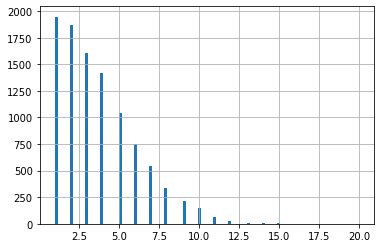

In [199]:
df.quantity.hist(bins=100)

#### Question 3

In [200]:
def split_train_test(df, test_proportion):
    test = df.sample(frac=test_proportion)
    train = df[~df.index.isin(test.index)]
    return train, test

# train, test = split_train_test(df, 0.1)

#### Question 4 / 5 (une seule variable)

<AxesSubplot:>

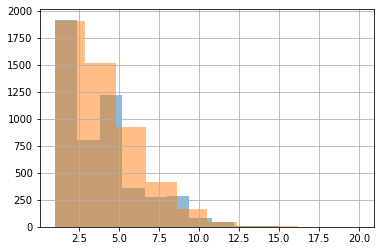

In [201]:
def split_train_test_advanced(df, test_proportion):
    l_train = []
    l_test = []
    for qty_value in df.quantity.unique():
        
        # On filtre sur la quantité
        df_filtered_on_qty = df[df['quantity'] == qty_value]
        
        # Un morceau avec proportion test_proportion
        test_filtered_on_qty = df_filtered_on_qty.sample(frac=test_proportion)
        
        # Le reste pour le train 
        train_filtered_on_qty = df_filtered_on_qty[
            ~df_filtered_on_qty.index.isin(test_filtered_on_qty.index)
        ]
        
        l_test.append(test_filtered_on_qty)
        l_train.append(train_filtered_on_qty)
        
    # Les concaténations respecte les proportions test_proportion 
    # et 1-test_proportion 
    # Car elles sont réunions de morceaux qui respectent tous les proportions
    return pd.concat(l_train), pd.concat(l_test)

train, test = split_train_test(df, 0.5)
train.quantity.mean(), test.quantity.mean()
train.quantity.hist(alpha=0.5)
test.quantity.hist(alpha=0.5)

#### Question 4 / 5 (deux variables)

3.6994 3.7418 3.7206
14.6458 14.5806 14.6132


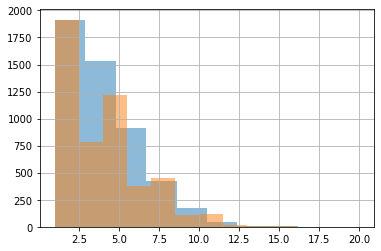

<AxesSubplot:>

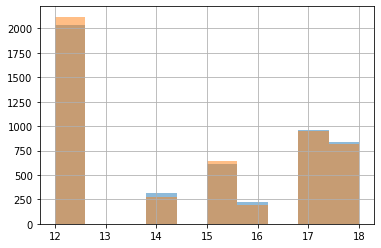

In [202]:
import matplotlib.pyplot as plt

def split_train_test_advanced_v2(df, test_proportion):
        
    l_train = []
    l_test = []
    for qty_value in df.quantity.unique():
        
        # On filtre sur la quantité
        df_filtered_on_qty = df[df['quantity'] == qty_value]
        
        for price_value in df_filtered_on_qty.price.unique():
            
            # On filtre sur le prix
            df_filtered_on_price = df_filtered_on_qty[df_filtered_on_qty['price'] == price_value]
        
            # Un morceau avec proportion test_proportion
            test_filtered_on_qty_and_price = df_filtered_on_price.sample(frac=test_proportion)
        
            # Le reste pour le train 
            train_filtered_on_qty_and_price = df_filtered_on_price[
            ~df_filtered_on_price.index.isin(test_filtered_on_qty_and_price.index)
            ]
        
            l_test.append(test_filtered_on_qty_and_price)
            l_train.append(train_filtered_on_qty_and_price)
        
    # Les concaténations respecte les proportions test_proportion 
    # et 1-test_proportion 
    # Car elles sont réunions de morceaux qui respectent tous les proportions
    return pd.concat(l_train), pd.concat(l_test)

train, test = split_train_test(df, 0.5)
print(train.quantity.mean(), test.quantity.mean(), df.quantity.mean())
print(train.price.mean(), test.price.mean(), df.price.mean())
train.quantity.hist(alpha=0.5)
test.quantity.hist(alpha=0.5)
plt.show()
train.price.hist(alpha=0.5)
test.price.hist(alpha=0.5)

# [Ex. 3 ] 

Le fichier `movie_metadata.csv` contient des informations au sujet de 5043 films qui ont été extraites de l'IMDB.

- 1.
 - a. Quels sont les 10 réalisateurs qui ont le meilleur score (`imdb_score`) moyen ?
 - b. Quels sont les 10 pays qui ont le meilleur score (`imdb_score`) moyen ?
 

- 2. 
 - a. Créer une colonne par genre (columne `genres` Action, Adventure...) qui faut True si le film a ce genre renseigné et 0 sinon.
 - b. Calculer le nombre total de films par genre
 - c. Calculer l'évolution du nombre de films par genre entre 2000 et 2010
 - d. Calculer l'évolution 'Year to Year' (% d'augmentation entre année N et N+1) du nombre de films pour chaque genre.
 - e. Faire de même pour chaque pays.
 
 
- 3. On s'intéresser seulement aux films publiés après 2000.
- a. Calculer le prix à la minute de chaque film (à partir des colonnes `budget` et `duration`)
- b. Quels sont tous les acteurs (renseignés dans les colonnes `actor_X_name`) qui ont joué dans les films qui ont un prix à la minute dans les 10% les plus élevés ? 


- 4. 
- a. Quels sont les réalisateurs dont les films ont la rentabilité moyenne (`gross` / `budget`) la plus élevée ?
- b. Même question pour les pays.


- 5. 
- a. Plusieurs utilisateurs de l'IMDB ont reporté que les notes seraient gonflées depuis quelques années. Que peut-on calculer pour essayer de s'en assurer ? Proposer deux méthodes.
- b. Implémenter ces deux méthodes.


- 6. Bâtir un modèle de prédiction de la variable `imdb_score` sur la base des autres variables et des données disponibles a priori (ie, pour réaliser la prédiction d'un film sorti en 2010, on peut utiliser toutes les statistiques des films sortis en 2009)


# [Ex. 4] 
###### On se restreint aux colonnes suivantes : 
['color', 'duration', 'country'  'budget', 'title_year', 'imdb_score']

Sélectionner un échantillon représentatif des :
- Films américains de 2000 à 2010 (10 % du total des films américains de 2000 à 2010)
- Films de Science-Fiction (20 % du total des films de SF)


Même questions en ajoutant la colonne 'genres'

# [Ex. 5] Une question d'entretien


Les questions suivantes ont été posées au cours de plusieurs entretiens pour des postes de Junior Data Scientists au sein d'une start-up parisienne : 

> On dispose d'un historique de ventes sur un site de ecommerce qui peut être résumé dans le fichier CSV suivant :  

|        timestamp | customer_id | product_id | quantity | price | revenue |
|-----------------:|------------:|-----------:|---------:|------:|--------:|
| 2022/12/27 13:05 |        1986 |       3456 |        4 |     5 |      20 |
| 2022/12/27 13:05 |        1986 |       3459 |        3 |     6 |      18 |
| 2022/12/27 13:06 |       24501 |       1242 |        2 |     4 |       8 |
| 2022/12/27 13:12 |       48285 |       3424 |        4 |    25 |     100 |
| 2022/12/27 13:14 |        2422 |       3456 |       10 |     5 |      50 |
|              ... |         ... |        ... |      ... |   ... |     ... |


- timestamp (datetime)
- customer_id (int)
- product_id (int)
- quantity (int)
- price (int)
- revenue (int)

Pour chaque transaction (ie une ligne dans le fichier) ci-dessus :
- 1. Ecrire qui une fonction qui prend en entrée la DataFrame des transactions et l'index d'une ligne (transaction) et renvoie True si la transaction a un chiffre d'affaire (colonne `revenue`) qui est dans le top 25% des transactions de la journée. Utiliser cette fonction pour flaguer ces transactions.


- 2. Même question mais avec le mois en cours à la place de la journée


In [203]:
l = [1]
l.append(2)
l.append(3)
## l.extend([4, 5]) 
## Exactement pareil que 
for value_to_append in [4, 5]:
    l.append(value_to_append)
l

[1, 2, 3, 4, 5]

In [204]:
df.timestamp.dt.date

0       2022-10-07
1       2022-07-11
2       2022-11-07
3       2022-10-05
4       2022-09-30
           ...    
9995    2022-08-08
9996    2022-11-22
9997    2022-08-06
9998    2022-11-25
9999    2022-12-30
Name: timestamp, Length: 10000, dtype: object

In [205]:
# Méthode 1 / variante A

# On veut constituer une liste qui contient les indexes de toutes les lignes dans le top 25%
# Liste des valeurs unique des journées (pas des les jours + heures, seulement les jours)
## dates = df. ....

dates = sorted(df.timestamp.dt.date.unique())

# Pour chaque date on veut récupérer les indexes du top 25
indexes_top_25p_all = []

for date in dates:
    transactions_on_date = df[df.timestamp.dt.date==date]
    transactions_on_date_top25p = transactions_on_date\
        .sort_values(
            "revenue", 
            ascending=False
        )\
        .head(int(0.25*len(transactions_on_date))) # 25 % des lignes
    # et donc pas les lignes telles que au dessus du 
    indexes_top_25p = transactions_on_date_top25p.index
    indexes_top_25p_all.extend(indexes_top_25p)
    
## def is_in_any_daily_top_25(df, row):
##    return #......

In [206]:
len(indexes_top_25p_all)

2426

In [207]:
# Méthode 1 / variante B

# On veut constituer une liste qui contient les indexes de toutes les lignes dans le top 25%
# Liste des valeurs unique des journées (pas des les jours + heures, seulement les jours)
## dates = df. ....

dates = sorted(df.timestamp.dt.date.unique())

# Pour chaque date on veut récupérer les indexes du top 25
indexes_top_25p_all = []

for date in dates:
    transactions_on_date = df[df.timestamp.dt.date==date]
   
    threshold = np.percentile(transactions_on_date.revenue, 75)
    
    indexes_top_25p = transactions_on_date[
        transactions_on_date.revenue > threshold
    ].index
    
    indexes_top_25p_all.extend(indexes_top_25p)
    

## def is_in_any_daily_top_25(df, row):
##    return #......

In [208]:
len(indexes_top_25p_all)

2391

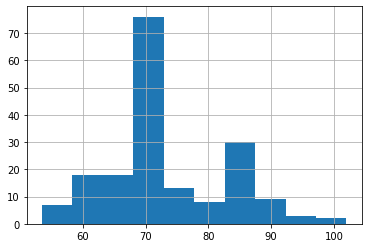

In [209]:
# Méthode 2 

df["revenue"] = df["price"] * df["quantity"]
df["date"] = df.timestamp.dt.date # df.timestamp.map(lambda d: d.date)

threshold_top25p_per_date = df.groupby("date").revenue.agg(lambda serie: np.percentile(serie, 75))
threshold_top25p_per_date.hist()

df = df.sort_values("date").set_index("date").join(
    threshold_top25p_per_date.to_frame(), # transforme la série en DataFrame
    rsuffix='_threshold_top25p_daily' # suffixe sur la DataFrame de droite 
)
df = df.reset_index()
# On filtre les transactions dont le CA
# est supérieur au seuil du top25% des transactions de la journée
df = df[df.revenue >= df.revenue_threshold_top25p_daily]

In [195]:
len(df)

2751

In [160]:
def my_func(df, row_index):
    return row_index in df.index